In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets list -s "Hotel Booking Demand with Economic Indicators"

ref                                                   title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
mlardi/hotel-booking-demand-with-economic-indicators  Hotel Booking Demand with Economic Indicators   1MB  2023-09-16 06:11:38            809         23  1.0              


In [ ]:
!kaggle datasets download -d mlardi/hotel-booking-demand-with-economic-indicators --unzip

  0% 0.00/1.41M [00:00<?, ?B/s]
100% 1.41M/1.41M [00:00<00:00, 146MB/s]


In [ ]:
df =  pd.read_csv("/content/hotel_bookings_raw.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfEncode = pd.get_dummies(df, columns=['hotel'], prefix=['hotel'])
dfEncode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [ ]:
kolomObj = dfEncode.dtypes[dfEncode.dtypes == "object"].index

In [ ]:
kolomObj

Index(['arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'MO_YR'],
      dtype='object')

In [ ]:
dfEncode.drop(columns=kolomObj, inplace=True)

In [ ]:
dfEncode

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC,hotel_City Hotel,hotel_Resort Hotel
0,0,342,2015,27,1,0,0,2,0.0,0,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0,1
1,0,737,2015,27,1,0,0,2,0.0,0,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0,1
2,0,7,2015,27,1,0,1,1,0.0,0,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0,1
3,0,13,2015,27,1,0,1,1,0.0,0,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,...,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0,1,0
119386,0,102,2017,35,31,2,5,3,0.0,0,...,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0,1,0
119387,0,34,2017,35,31,2,5,2,0.0,0,...,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0,1,0
119388,0,109,2017,35,31,2,5,2,0.0,0,...,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0,1,0


In [ ]:
dfEncode.dropna(inplace=True)

In [ ]:
dfEncode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102867 entries, 3 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     102867 non-null  int64  
 1   lead_time                       102867 non-null  int64  
 2   arrival_date_year               102867 non-null  int64  
 3   arrival_date_week_number        102867 non-null  int64  
 4   arrival_date_day_of_month       102867 non-null  int64  
 5   stays_in_weekend_nights         102867 non-null  int64  
 6   stays_in_week_nights            102867 non-null  int64  
 7   adults                          102867 non-null  int64  
 8   children                        102867 non-null  float64
 9   babies                          102867 non-null  int64  
 10  is_repeated_guest               102867 non-null  int64  
 11  previous_cancellations          102867 non-null  int64  
 12  previous_booking

In [ ]:
scaler = MinMaxScaler()
normal_data = scaler.fit_transform(dfEncode)
df = pd.DataFrame(normal_data, columns=dfEncode.columns)

In [ ]:
X = df.drop(columns=["is_canceled"])
y = df.loc[:, "is_canceled"]

In [ ]:
model = SelectKBest(score_func=chi2, k=10)
fit = model.fit(X,y)

In [ ]:
dfKbest = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)], axis=1)

In [ ]:
dfKbest.columns = ['feature', 'score']
dfKbest.sort_values(by="score", ascending=False).head(10)

,feature,score
17,total_of_special_requests,1430.273878
0,lead_time,1290.123040
16,required_car_parking_spaces,1163.613784
30,hotel_Resort Hotel,954.732590
23,INTRSRT,609.802271
29,hotel_City Hotel,428.182449
10,previous_cancellations,401.237095
24,GDP,396.743780
28,DIS_INC,369.702880
22,UNRATE,366.294407


In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.11755258 0.0551341  0.22663249 0.05725322 0.02719187 0.03702278
 0.0174928  0.00858098 0.00107068 0.00257662 0.03012666 0.00085815
 0.01722844 0.04603477 0.00571866 0.06980415 0.01831884 0.05278028
 0.02456179 0.01271673 0.01073039 0.01372561 0.02373229 0.0158577
 0.02349461 0.01725709 0.01612524 0.00980622 0.02457329 0.00827373
 0.00776723]


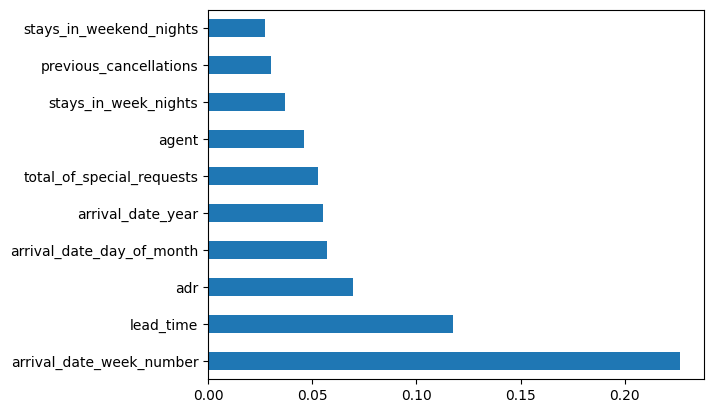

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index

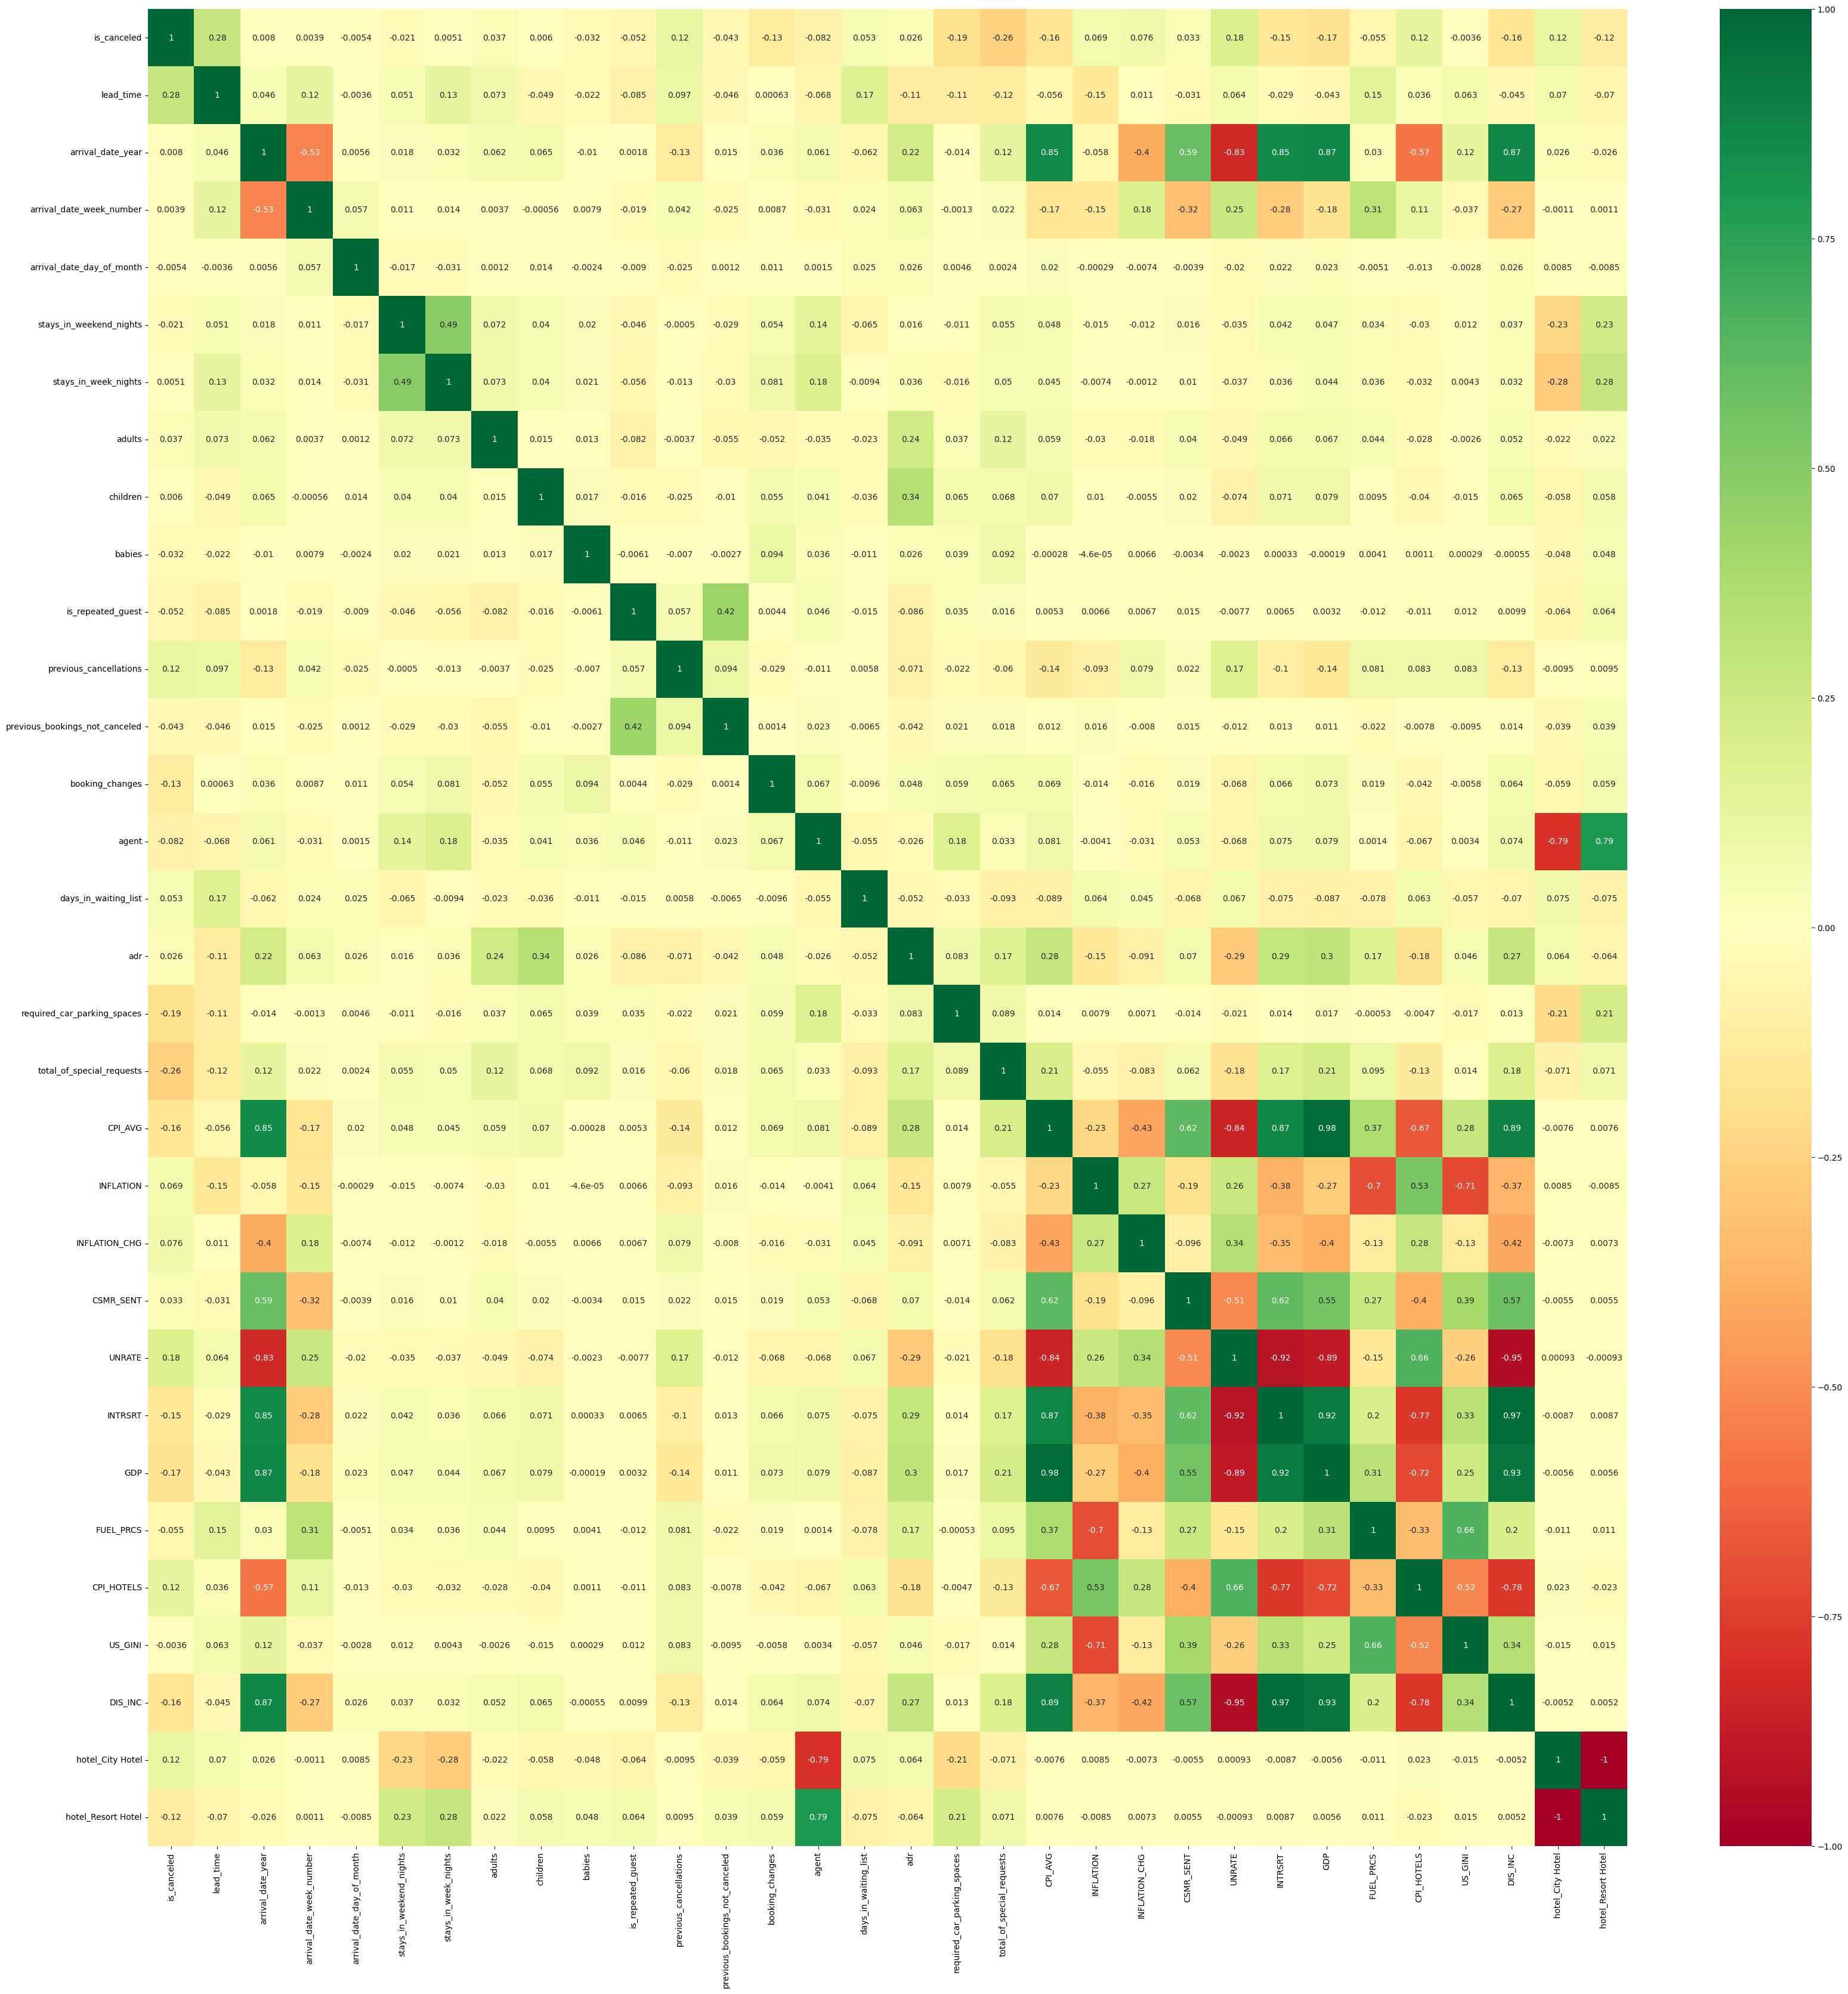

In [ ]:
plt.figure(figsize=(40,40))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Kesimpulan**
1. Berdasarkan metode kbest, data yang mempengaruhi apakah seseorang akan membatalkan pemesanan hotelnya ialah total special request, lead time, ruang parkir dan hotel resort atau bukan.

2. Salah satu kolom yang cukup mempengaruhi nilai dari is_cenceled adalah arrival date week number.

3. Is_cenceled juga dipengaruhi secara positif oleh lead_time dan pembatalan yang telah dilakukan sebelumnya. Setelah sebelumnya telah disebutkan bahwa total speciel request mempengaruhi pembatalan, ternyatan pengaruhnya terjadi secara negatif. Jadi misalnya ketika is_cenceled bernilai 1, maka total spesial requestnya seharusnya berada dekat dengan 0.